In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [27]:
d=pd.read_csv("E:/LETS_GROW_MORE_TASKS/iris_classifier.csv")

In [28]:
d.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
d.drop('Id',axis=1,inplace=True)

In [30]:
d.columns=['sepal length','sepal width','petal length','petal width','class']

## EXPLORATORY DATA ANALYSIS 

In [31]:
d.shape

(150, 5)

In [32]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [33]:
d.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [34]:
d.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [37]:
d['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

## UNIVARIANT ANALYSIS

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal length, dtype: float64

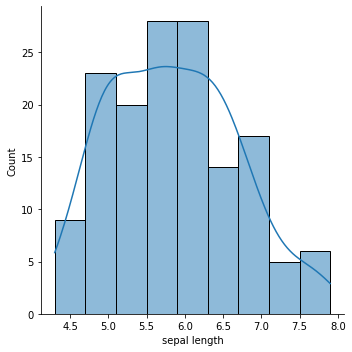

In [38]:
sns.displot(d['sepal length'],kde=True)

d['sepal length'].describe()

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal width, dtype: float64

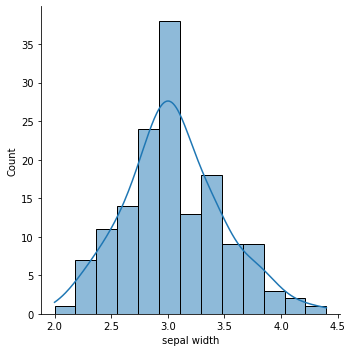

In [39]:
sns.displot(d['sepal width'],kde=True)

d['sepal width'].describe()

count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal length, dtype: float64

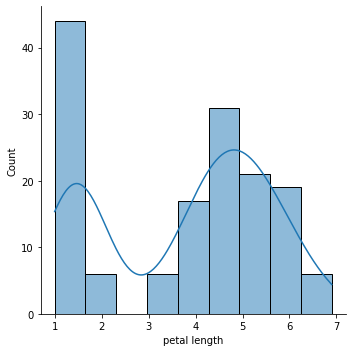

In [40]:
sns.displot(d['petal length'],kde=True)

d['petal length'].describe()

count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal width, dtype: float64

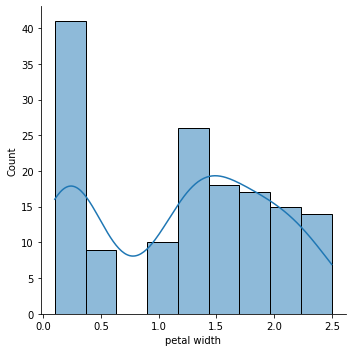

In [41]:
sns.displot(d['petal width'],kde=True)

d['petal width'].describe()

<AxesSubplot:xlabel='class', ylabel='count'>

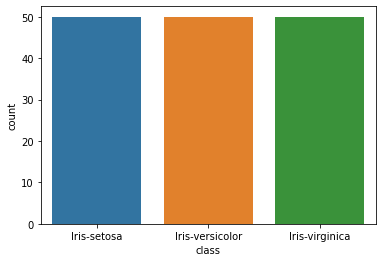

In [42]:
sns.countplot(x='class',data=d)

## BI-VARIANT ANALYSIS

<AxesSubplot:xlabel='sepal length', ylabel='petal length'>

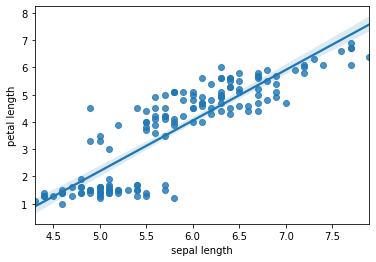

In [43]:
sns.regplot(x='sepal length',y='petal length',data=d)

<AxesSubplot:xlabel='petal length', ylabel='petal width'>

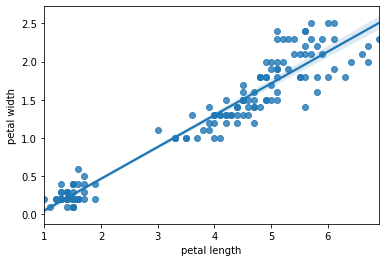

In [44]:
sns.regplot(x='petal length',y='petal width',data=d)

<AxesSubplot:xlabel='sepal length', ylabel='petal length'>

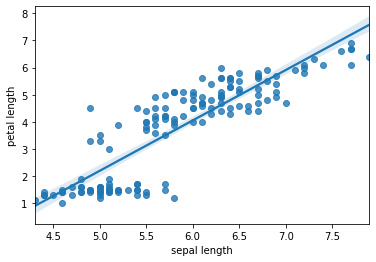

In [45]:
sns.regplot(x='sepal length',y='petal length',data=d)

<AxesSubplot:xlabel='petal width', ylabel='sepal width'>

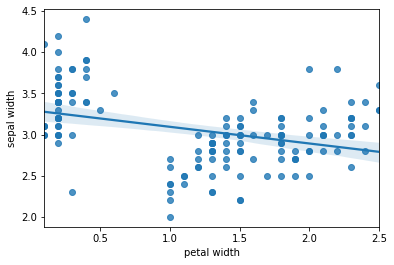

In [46]:
sns.regplot(x='petal width',y='sepal width',data=d)

In [47]:
setosa=d[d['class']=='Iris-setosa']

versicolor=d[d['class']=='Iris-versicolor']

virginica=d[d['class']=='Iris-virginica']

<AxesSubplot:xlabel='class', ylabel='sepal length'>

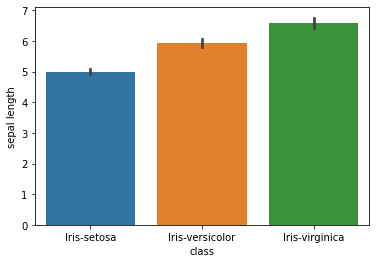

In [48]:
sns.barplot(x=d['class'],y=d['sepal length'])

<AxesSubplot:xlabel='class', ylabel='sepal width'>

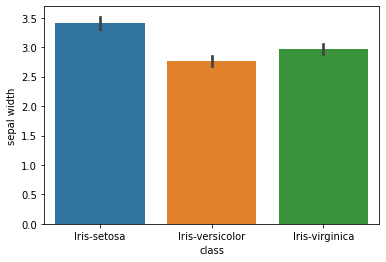

In [49]:
sns.barplot(x=d['class'],y=d['sepal width'])

<AxesSubplot:xlabel='class', ylabel='petal length'>

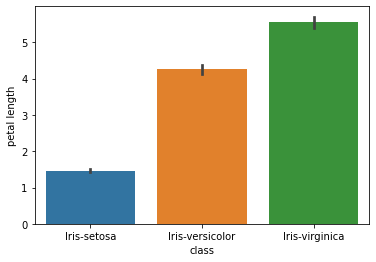

In [50]:
sns.barplot(x=d['class'],y=d['petal length'])

<AxesSubplot:xlabel='class', ylabel='petal width'>

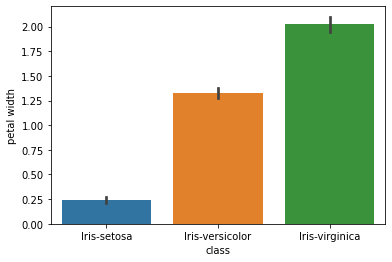

In [51]:
sns.barplot(x=d['class'],y=d['petal width'])

## SEGRATING DATA INTO TRAIN & TEST SETS

In [52]:
x=d.iloc[:,0:4]

y=d.iloc[:,4]


In [53]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [54]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((105, 4), (105,), (45, 4), (45,))

## STANDARDIZING THE DATA

In [55]:
from sklearn.preprocessing import StandardScaler


sc=StandardScaler().fit(x_train)

x_train=sc.transform(x_train)

x_test=sc.transform(x_test)

## ENCODING OUTPUT VARIABLE

In [56]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder().fit(y_train)

y_train=le.transform(y_train)

y_test=le.transform(y_test)

In [57]:
y_train

array([1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0,
       1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0,
       2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [58]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

## CREATING MODEL AND MAKING PREDICTIONS ON TEST DATA

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
cls=DecisionTreeClassifier()

cls.fit(x_train,y_train)

DecisionTreeClassifier()

## EVALUATING PERFORMANCE OF MODEL

Accuracy score of model 100.0


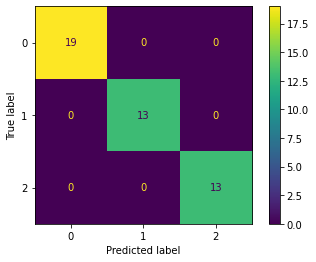

In [62]:
y_pred=cls.predict(x_test)


from sklearn.metrics import accuracy_score,plot_confusion_matrix

print("Accuracy score of model {}".format(accuracy_score(y_test,y_pred)*100))

plot_confusion_matrix(cls,x_test,y_test)

plt.show()

## VISUALIZING THE DECISION TREE

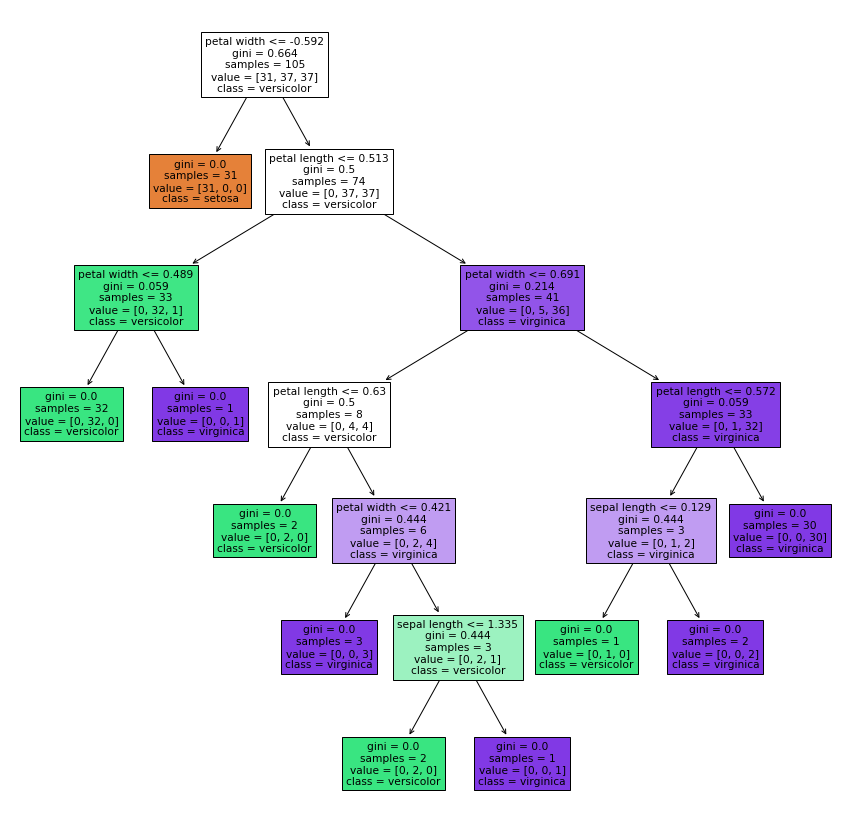

In [74]:
from sklearn.tree import plot_tree
fn=['sepal length','sepal width','petal length','petal width']
cn=['setosa', 'versicolor', 'virginica']
plt.figure(figsize=(15,15))
plot_tree(cls,feature_names = fn, class_names=cn,filled = True)
fig.savefig('imagename.png')